### Il notebook usa la classe AmazonScraper per estrarre recensioni amazon dai link sotto definiti. Queste recensioni costituiscono il test_set.csv

In [1]:
import time
import pandas as pd
from review_scraper import AmazonScraper
import os

In [14]:
#questa cella scrapa le recensioni

amz_scraper = AmazonScraper()

products_url = {"echo_dot_3_gen.csv":"https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=avp_only_reviews&pageNumber=1&filterByStar=critical",
                "echo_dot_4_gen":"https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=avp_only_reviews&pageNumber=1&filterByStar=critical",
                "echo_4_gen":"https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=avp_only_reviews&pageNumber=1&filterByStar=critical",
                "echo_studio":"https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=avp_only_reviews&pageNumber=1&filterByStar=critical",
                "echo_show_10": "https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=avp_only_reviews&pageNumber=1&filterByStar=critical",
                "echo_show_8":"https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=avp_only_reviews&pageNumber=1&filterByStar=critical",
                "echo_auto":"https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=avp_only_reviews&pageNumber=1&filterByStar=critical"}


for product in products_url:
    reviews = []
    for page in range(1, 300):
        response = amz_scraper.scrapeReviews(url=products_url[product], page_num=page, filter_by="helpful", star="critical")
        reviews.extend(response)
        time.sleep(1) # per evitare ban

    df = pd.DataFrame(reviews)

    #######################################################
    #pulisce i dati

    ratings = []
    feedbacks = []

    for score in df["rating"]:
        try:
            value = int(score[0])
        except TypeError:
            print("Errore sul valore:", score)
        if value <= 2:
            feedbacks.append(0)
        elif value >= 3:
            feedbacks.append(1)

        ratings.append(value)

    df["rating"] = ratings
    df["feedback"] = feedbacks
    df.drop(["review_title", "username", "profile_url", "verified_purchase"], axis=1, inplace=True)
    df.rename({"product_name":"variation", "comment":"verified_reviews"}, inplace=True, axis=1)

    #######################################################

    df.to_csv(f"scraped_data/{product}", sep="\t", index = False) #salva

Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=1...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=2...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=3...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=4...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=5...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&

Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=47...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=48...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=49...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=50...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=51...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=hel

Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=93...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=94...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=95...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=96...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=97...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=hel

Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=139...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=140...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=141...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=142...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=143...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortB

Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=185...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=186...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=187...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=188...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=189...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortB

Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=231...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=232...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=233...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=234...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=235...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortB

Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=277...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=278...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=279...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=280...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=281...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R?reviewerType=all_reviews&sortB

Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=24...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=25...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=26...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=27...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=28...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=hel

Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=70...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=71...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=72...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=73...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=74...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=hel

Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=116...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=117...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=118...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=119...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=120...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortB

Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=162...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=163...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=164...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=165...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=166...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortB

Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=208...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=209...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=210...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=211...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=212...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortB

Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=254...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=255...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=256...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=257...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=258...
Processing https://www.amazon.com/Echo-Dot/product-reviews/B07XJ8C8F5?reviewerType=all_reviews&sortB

Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=1...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=2...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=3...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=4...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=5...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all

Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=46...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=47...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=48...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=49...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=50...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerTyp

Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=91...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=92...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=93...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=94...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=95...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerTyp

Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=136...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=137...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=138...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=139...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=140...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?review

Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=181...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=182...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=183...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=184...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=185...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?review

Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=226...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=227...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=228...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=229...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=230...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?review

Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=271...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=272...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=273...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=274...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=275...
Processing https://www.amazon.com/Echo-4th-Gen/product-reviews/B07XKF5RM3?review

Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=17...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=18...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=19...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=20...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=21...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_

Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=63...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=64...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=65...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=66...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=67...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_

Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=108...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=109...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=110...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=111...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=112...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType

Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=153...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=154...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=155...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=156...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=157...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType

Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=198...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=199...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=200...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=201...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=202...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType

Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=243...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=244...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=245...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=246...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=247...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType

Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=288...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=289...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=290...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=291...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=292...
Processing https://www.amazon.com/Echo-Studio/product-reviews/B07G9Y3ZMC?reviewerType

Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=34...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=35...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=36...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=37...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=38...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerTyp

Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=79...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=80...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=81...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=82...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=83...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerTyp

Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=124...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=125...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=126...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=127...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=128...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?review

Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=169...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=170...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=171...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=172...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=173...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?review

Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=214...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=215...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=216...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=217...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=218...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?review

Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=259...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=260...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=261...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=262...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=263...
Processing https://www.amazon.com/echo-show-10/product-reviews/B07VHZ41L8?review

Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=5...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=6...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=7...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=8...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=9...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_revie

Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=51...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=52...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=53...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=54...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=55...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_

Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=97...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=98...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=99...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=100...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=101...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=al

Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=142...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=143...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=144...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=145...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=146...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType

Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=187...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=188...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=189...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=190...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=191...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType

Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=232...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=233...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=234...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=235...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=236...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType

Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=277...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=278...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=279...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=280...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=281...
Processing https://www.amazon.com/Echo-Show-8/product-reviews/B07PF1Y28C?reviewerType

Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=19...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=20...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=21...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=22...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/produc

Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=56...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=57...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=58...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=59...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/produc

Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=93...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=94...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=95...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=96...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/produc

Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=130...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=131...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=132...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=133...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/pr

Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=167...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=168...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=169...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=170...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/pr

Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=204...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=205...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=206...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=207...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/pr

Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=241...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=242...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=243...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=244...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/pr

Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=278...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=279...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=280...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/product-reviews/B07VTK654B?reviewerType=all_reviews&sortBy=helpful&reviewerType=avp_only_reviews&filterByStar=critical&pageNumber=281...
Processing https://www.amazon.com/Echo-Auto--Hands-free-Alexa-in-your-car-with-your-phone/pr

In [ ]:
#################################
#unisce tutti i df estratti in uno unico
df_list = []

for path in os.listdir("scraped_data"):
    df = pd.read_csv(f"scraped_data/{path}", sep = "\t")
    df_list.append(df)

total_df = pd.concat(df_list)

In [18]:
total_df.to_csv("data_for_pt.csv", sep = "\t", index = False) #salva il df totale come test set

In [4]:
df = pd.read_csv("data_for_pt.csv", sep="\t", encoding = "utf-8")

In [5]:
df

,Unnamed: 0,variation,verified_reviews,rating,date,feedback
0,0,Echo 4th Gen,QUICK SUMMARY:---------------------------The 4...,3,"October 3, 2021",1
1,1,Echo 4th Gen,I will start off on a good note: The sound is...,3,"October 17, 2022",1
2,2,Echo 4th Gen,"I was super excited to get these, I’ve had an ...",1,"August 23, 2022",0
3,3,Echo 4th Gen,[Edit] This is my second time to edit this rev...,1,"January 14, 2021",0
4,4,Echo 4th Gen,Update October 11—-DO NOT BUY. AMOAZON WILL FO...,1,"July 8, 2022",0
...,...,...,...,...,...,...
22385,2985,Echo Studio,"Very, Very good sound for a small speaker. Hea...",5,"July 12, 2021",1
22386,2986,Echo Studio,I feel like the sound quality although better ...,3,"January 19, 2021",1
22387,2987,Echo Studio,We built a large deck in our backyard and want...,5,"August 31, 2020",1
22388,2988,Echo Studio,NaN,5,"September 26, 2021",1


In [6]:
df.describe()

,Unnamed: 0,rating,feedback
count,22390.000000,22390.000000,22390.000000
mean,1411.766637,4.307325,0.942206
std,890.239013,0.972173,0.233358
min,0.000000,1.000000,0.000000
25%,589.000000,4.000000,1.000000
50%,1389.000000,5.000000,1.000000
75%,2188.000000,5.000000,1.000000
max,2989.000000,5.000000,1.000000


In [7]:
df['verified_reviews'].str.len()

0        5425.0
1        1137.0
2        4128.0
3        5838.0
4        4047.0
          ...  
22385      75.0
22386     226.0
22387     213.0
22388       NaN
22389     137.0
Name: verified_reviews, Length: 22390, dtype: float64

In [8]:
print(min(df['verified_reviews'].str.len()))
print(max(df['verified_reviews'].str.len()))

1.0
14480.0


In [9]:
df['verified_reviews'].fillna('', inplace=True)
print(df['verified_reviews'].map(len).max())

14480


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

media caratteri recensioni positive: 384.1984262419416
media caratteri recensioni negative: 1399.4142194744977


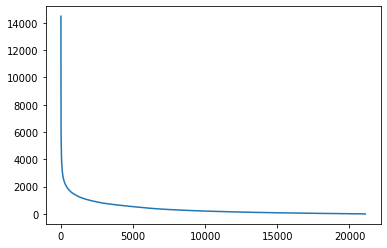

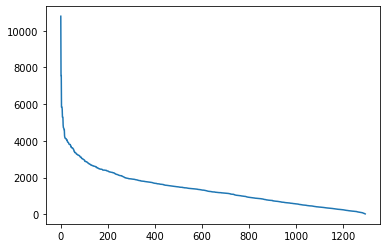

In [11]:
reviews_len_pos = []
reviews_len_neg = []
for rec in df[df["feedback"] == 1]["verified_reviews"]:
    reviews_len_pos.append(len(rec))

mean_pos = sum(reviews_len_pos)/len(reviews_len_pos)

for rec in df[df["feedback"] == 0]["verified_reviews"]:
    reviews_len_neg.append(len(rec))

mean_neg = sum(reviews_len_neg)/len(reviews_len_neg)

print("media caratteri recensioni positive:", mean_pos)
print("media caratteri recensioni negative:", mean_neg)

plt.plot(sorted(reviews_len_pos, reverse=True))
plt.show()
plt.plot(sorted(reviews_len_neg, reverse=True))
plt.show()